In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# Define the file path
file_path = 'C:/Users/hp/Documents/PG in Data Analytics/Master Thesis/LOL_CSGO_tournaments_Details.csv'

# Attempt to read the CSV file with default encoding
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully with default encoding.")
except UnicodeDecodeError:
    # If default encoding fails, try ISO-8859-1
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
    print("Dataset loaded successfully with ISO-8859-1 encoding.")

Dataset loaded successfully with ISO-8859-1 encoding.


In [144]:
data.head()

,Tournament Name,Start Date,End Date,Prize Pool,Location,Number of Teams,Winner,Runner-Up,Game,Viewers (Twitch),Viewers (Youtube)
0,Blast Premier Fall Final 2024,25-09-2024,29-09-2024,"$425,000",Copenhagen,8,TBD,TBD,Counter Strike Global Offensive,4120345,17259426
1,intel Extreme Masters Cologne 2024,07-08-2024,18-08-2024,"$1,000,000",Cologne,24,Vitality,NAVI,Counter Strike Global Offensive,654332,12878079
2,Blast Premier Fall Group 2024,29-07-2024,04-08-2024,"$190,000",Copenhagen,16,G2,Spirit,Counter Strike Global Offensive,123422,11004269
3,PGL Major Copenhagen 2024,17-03-2024,31-03-2024,"$1,250,000",Copenhagen,24,NAVI,FaZe,Counter Strike Global Offensive,3592794,12878867
4,intel Extreme Masters Katowice 2024,31-01-2024,11-02-2024,"$1,000,000",Katowice,24,Spirit,FaZe,Counter Strike Global Offensive,24879116,12510498


In [145]:
data.columns = data.columns.str.strip()

In [147]:
data.head()

,Tournament Name,Start Date,End Date,Prize Pool,Location,Number of Teams,Winner,Runner-Up,Game,Viewers (Twitch),Viewers (Youtube)
0,Blast Premier Fall Final 2024,25-09-2024,29-09-2024,425000.0,Copenhagen,8,TBD,TBD,Counter Strike Global Offensive,4120345,17259426
1,intel Extreme Masters Cologne 2024,07-08-2024,18-08-2024,1000000.0,Cologne,24,Vitality,NAVI,Counter Strike Global Offensive,654332,12878079
2,Blast Premier Fall Group 2024,29-07-2024,04-08-2024,190000.0,Copenhagen,16,G2,Spirit,Counter Strike Global Offensive,123422,11004269
3,PGL Major Copenhagen 2024,17-03-2024,31-03-2024,1250000.0,Copenhagen,24,NAVI,FaZe,Counter Strike Global Offensive,3592794,12878867
4,intel Extreme Masters Katowice 2024,31-01-2024,11-02-2024,1000000.0,Katowice,24,Spirit,FaZe,Counter Strike Global Offensive,24879116,12510498


In [148]:
# Remove '$' and ',' from 'Prize Pool' and convert to float
data['Prize Pool'] = data['Prize Pool'].replace('[\$,]', '', regex=True).astype(float)


In [149]:
data.head()

,Tournament Name,Start Date,End Date,Prize Pool,Location,Number of Teams,Winner,Runner-Up,Game,Viewers (Twitch),Viewers (Youtube)
0,Blast Premier Fall Final 2024,25-09-2024,29-09-2024,425000.0,Copenhagen,8,TBD,TBD,Counter Strike Global Offensive,4120345,17259426
1,intel Extreme Masters Cologne 2024,07-08-2024,18-08-2024,1000000.0,Cologne,24,Vitality,NAVI,Counter Strike Global Offensive,654332,12878079
2,Blast Premier Fall Group 2024,29-07-2024,04-08-2024,190000.0,Copenhagen,16,G2,Spirit,Counter Strike Global Offensive,123422,11004269
3,PGL Major Copenhagen 2024,17-03-2024,31-03-2024,1250000.0,Copenhagen,24,NAVI,FaZe,Counter Strike Global Offensive,3592794,12878867
4,intel Extreme Masters Katowice 2024,31-01-2024,11-02-2024,1000000.0,Katowice,24,Spirit,FaZe,Counter Strike Global Offensive,24879116,12510498


In [151]:
# Convert 'Start Date' and 'End Date' to datetime format
data['Start Date'] = pd.to_datetime(data['Start Date'], format='%d-%m-%Y', errors='coerce')
data['End Date'] = pd.to_datetime(data['End Date'], format='%d-%m-%Y', errors='coerce')
data['Year'] = pd.DatetimeIndex(data['Start Date']).year

In [153]:
data['Total Viewers'] = data['Viewers (Twitch)'] + data['Viewers (Youtube)']
data['Duration'] = (data['End Date'] - data['Start Date']).dt.days

In [154]:
lol_data = data[data['Game'] == 'League of Legends']
csgo_data = data[data['Game'] == 'Counter Strike Global Offensive']

In [155]:
print(f"League of Legends data points: {len(lol_data)}")
print(f"Counter Strike Global Offensive data points: {len(csgo_data)}")

League of Legends data points: 20
Counter Strike Global Offensive data points: 13


In [156]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Tournament Name      0
Start Date           0
End Date             0
Prize Pool           0
Location             0
Number of Teams      0
Winner               0
Runner-Up            0
Game                 0
Viewers (Twitch)     0
Viewers (Youtube)    0
Year                 0
Total Viewers        0
Duration             0
dtype: int64


In [157]:
# Summary statistics for numerical columns
basic_stats = data.describe()
print("Basic Statistical Summary:\n", basic_stats)


Basic Statistical Summary:
                           Start Date                       End Date  \
count                             33                             33   
mean   2023-11-21 03:38:10.909090816  2024-01-02 21:49:05.454545408   
min              2023-01-01 00:00:00            2023-01-29 00:00:00   
25%              2023-06-08 00:00:00            2023-07-30 00:00:00   
50%              2023-12-13 00:00:00            2024-01-28 00:00:00   
75%              2024-05-01 00:00:00            2024-08-03 00:00:00   
max              2024-09-25 00:00:00            2024-11-02 00:00:00   
std                              NaN                            NaN   

         Prize Pool  Number of Teams  Viewers (Twitch)  Viewers (Youtube)  \
count  3.300000e+01        33.000000      3.300000e+01       3.300000e+01   
mean   3.448293e+05        15.000000      5.056540e+06       1.428029e+07   
min    3.832240e+03         2.000000      8.598000e+03       5.276400e+04   
25%    8.437902e+04     

Distribution of Prize Pools for League of Legends vs CS:GO

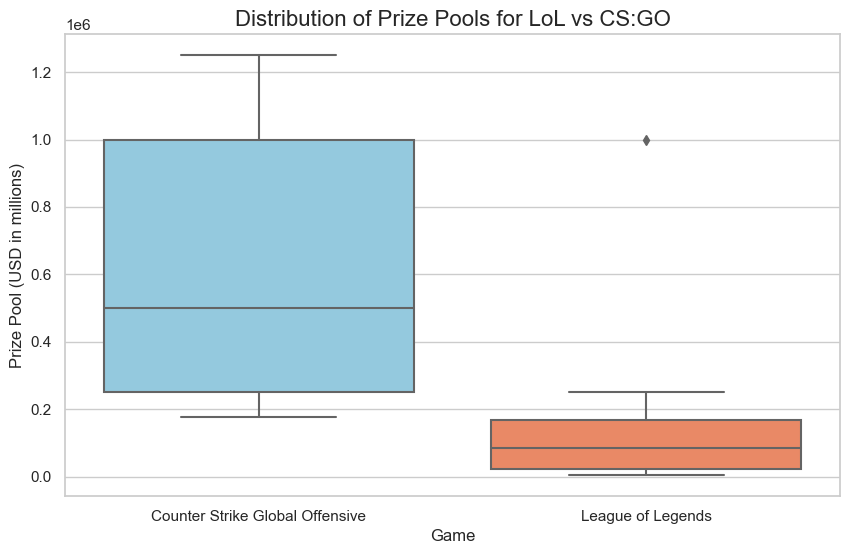

In [201]:
# Plot 1: Distribution of Prize Pools Across Tournaments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Game', y='Prize Pool', data=data, palette=['skyblue', 'coral'])
plt.title('Distribution of Prize Pools for LoL vs CS:GO', fontsize=16)
plt.ylabel('Prize Pool (USD in millions)', fontsize=12)
plt.xlabel('Game', fontsize=12)
plt.show()


Total Prize Pool Comparison for LoL vs CS:GO

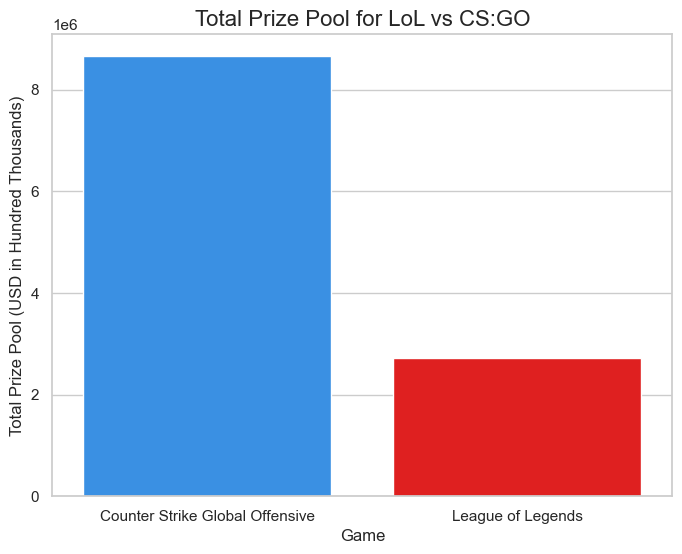

In [206]:
total_prize_pool = data.groupby('Game')['Prize Pool'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Game', y='Prize Pool', data=total_prize_pool, palette=['dodgerblue', 'red'])
plt.title('Total Prize Pool for LoL vs CS:GO', fontsize=16)
plt.ylabel('Total Prize Pool (USD in Hundred Thousands)', fontsize=12)
plt.show()


Trends in Number of Teams Participating Over Time for LoL vs CS:GO

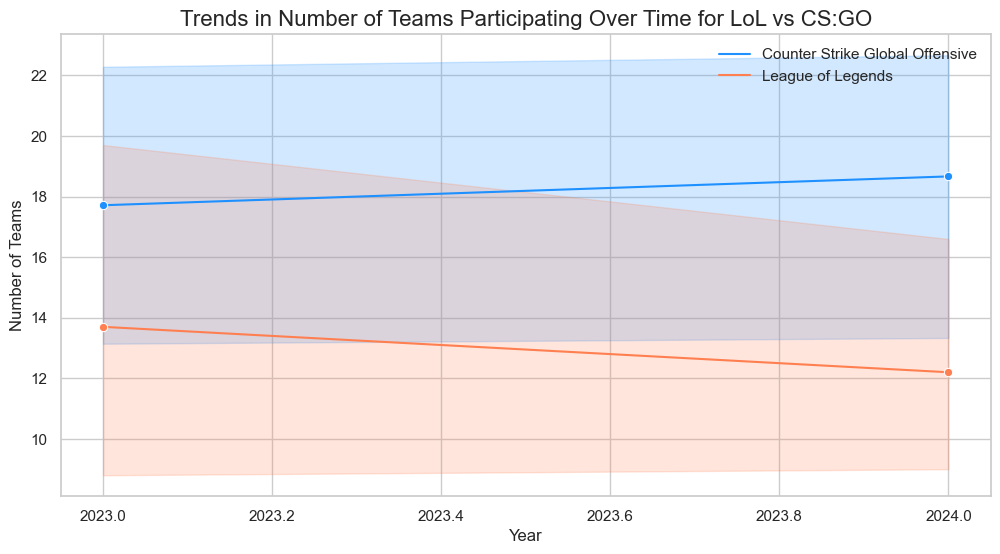

In [204]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Teams', hue='Game', data=data, marker='o', palette=['dodgerblue', 'coral'])
plt.title('Trends in Number of Teams Participating Over Time for LoL vs CS:GO', fontsize=16)
plt.ylabel('Number of Teams', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend()
plt.show()

Total Viewership (Twitch and YouTube) for LoL vs CS:GO

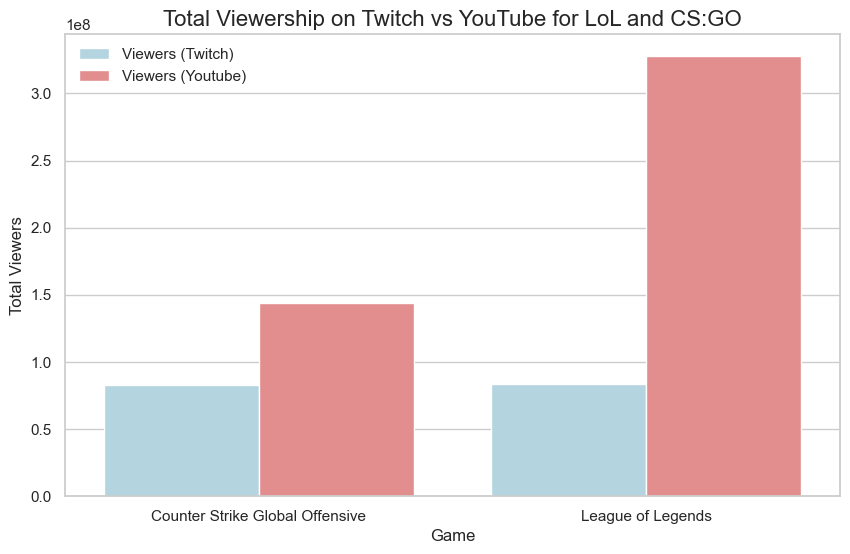

In [205]:
# Plot 4: Total Viewership (Twitch and YouTube) for LoL vs CS:GO
# Sum viewership for each game
total_viewership = data.groupby('Game')[['Viewers (Twitch)', 'Viewers (Youtube)', 'Total Viewers']].sum().reset_index()

# Melt the DataFrame for easy plotting
viewership_melted = total_viewership.melt(id_vars='Game', 
                                          value_vars=['Viewers (Twitch)', 'Viewers (Youtube)'], 
                                          var_name='Platform', 
                                          value_name='Viewers Value')  # Changed to avoid the error

# Plot the viewership comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Game', y='Viewers Value', hue='Platform', data=viewership_melted, palette=['lightblue', 'lightcoral'])
plt.title('Total Viewership on Twitch vs YouTube for LoL and CS:GO', fontsize=16)
plt.ylabel('Total Viewers', fontsize=12)
plt.legend()
plt.show()


Comparison of Average Viewership on Twitch vs YouTube for LoL and CS:GO

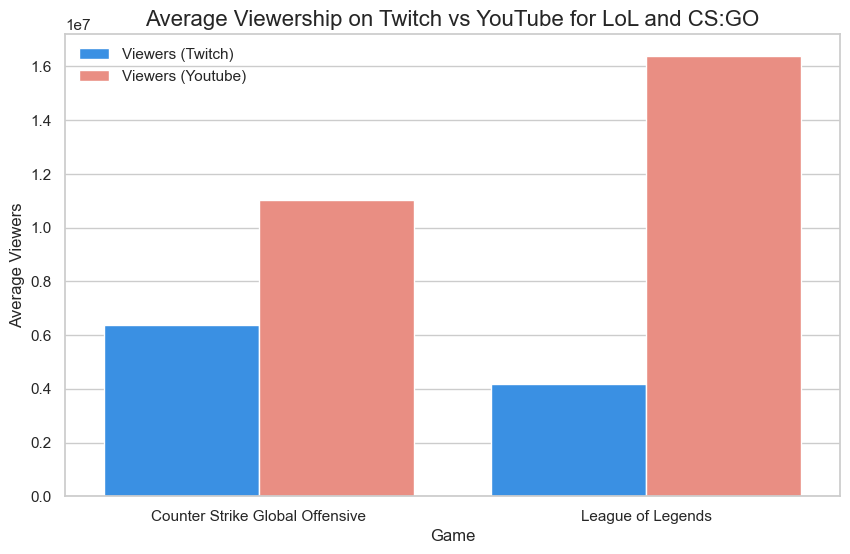

In [207]:
average_viewership = data.groupby('Game')[['Viewers (Twitch)', 'Viewers (Youtube)']].mean().reset_index()
average_viewership_melted = average_viewership.melt(id_vars='Game', value_vars=['Viewers (Twitch)', 'Viewers (Youtube)'], var_name='Platform', value_name='Average Viewers')
plt.figure(figsize=(10, 6))
sns.barplot(x='Game', y='Average Viewers', hue='Platform', data=average_viewership_melted, palette=['dodgerblue', 'salmon'])
plt.title('Average Viewership on Twitch vs YouTube for LoL and CS:GO', fontsize=16)
plt.ylabel('Average Viewers', fontsize=12)
plt.legend()
plt.show()

Top 5 Tournaments by Prize Pool for LoL vs CS:GO

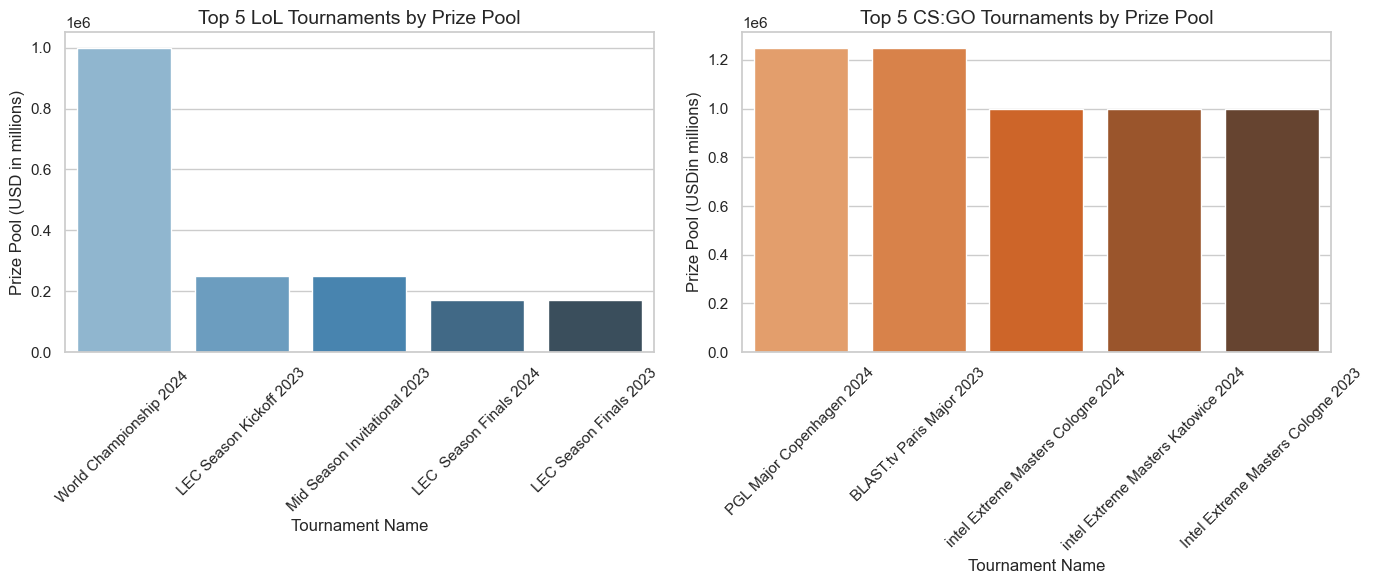

In [208]:
    # Plot 6: Top 5 Tournaments by Prize Pool
lol_top5_prize = lol_data.nlargest(5, 'Prize Pool')
csgo_top5_prize = csgo_data.nlargest(5, 'Prize Pool')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='Tournament Name', y='Prize Pool', data=lol_top5_prize, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 5 LoL Tournaments by Prize Pool', fontsize=14)
axes[0].set_ylabel('Prize Pool (USD in millions)')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Tournament Name', y='Prize Pool', data=csgo_top5_prize, ax=axes[1], palette='Oranges_d')
axes[1].set_title('Top 5 CS:GO Tournaments by Prize Pool', fontsize=14)
axes[1].set_ylabel('Prize Pool (USDin millions)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Top 5 Tournaments by Viewership for LoL vs CS:GO

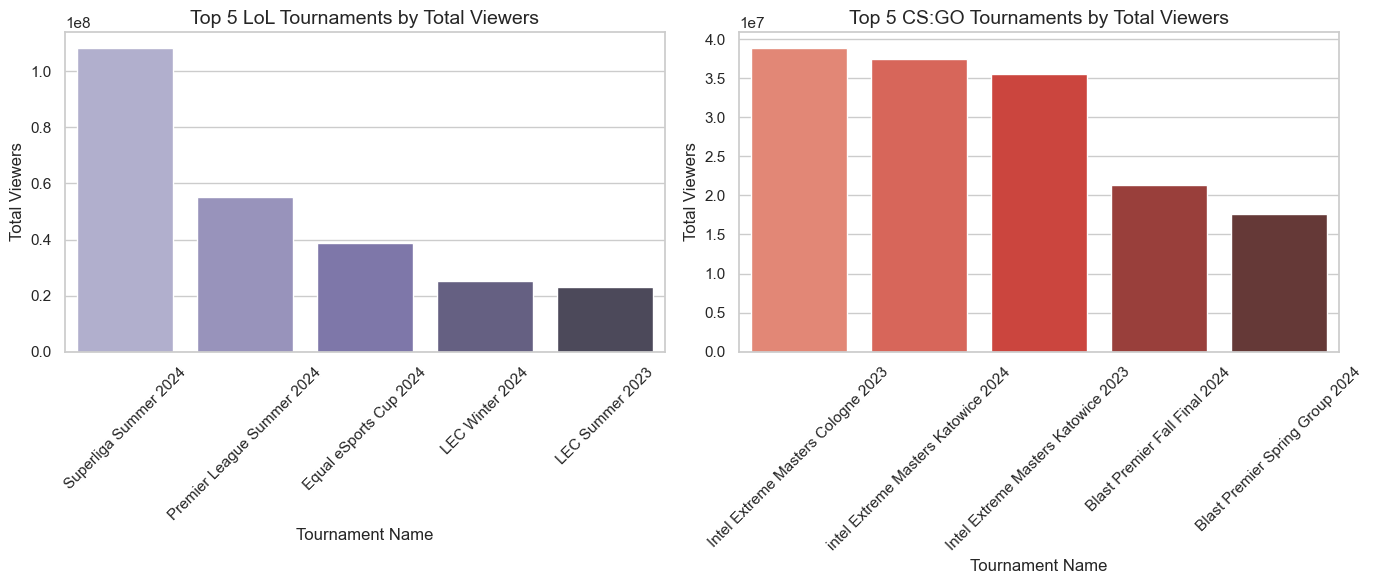

In [176]:
# Plot 7: Top 5 Tournaments by Viewership
lol_top5_viewers = lol_data.nlargest(5, 'Total Viewers')
csgo_top5_viewers = csgo_data.nlargest(5, 'Total Viewers')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='Tournament Name', y='Total Viewers', data=lol_top5_viewers, ax=axes[0], palette='Purples_d')
axes[0].set_title('Top 5 LoL Tournaments by Total Viewers', fontsize=14)
axes[0].set_ylabel('Total Viewers')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Tournament Name', y='Total Viewers', data=csgo_top5_viewers, ax=axes[1], palette='Reds_d')
axes[1].set_title('Top 5 CS:GO Tournaments by Total Viewers', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Correlation Between Prize Pool and Total Viewership for LoL vs CS:GO

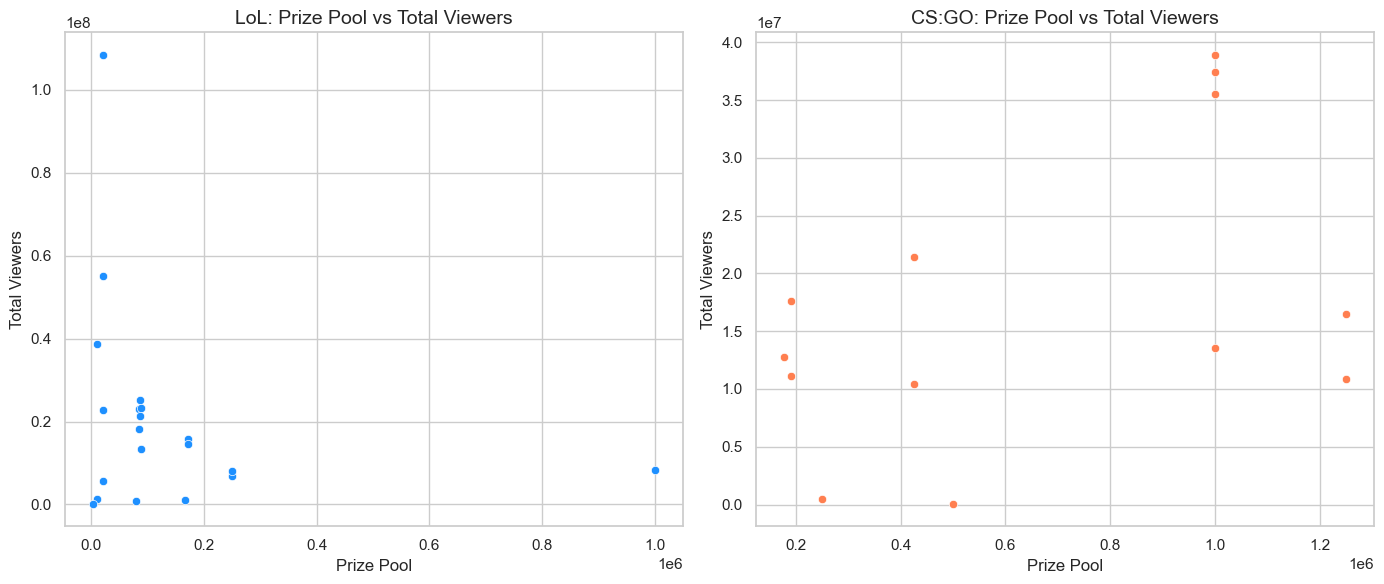

In [177]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x='Prize Pool', y='Total Viewers', data=lol_data, ax=axes[0], color='dodgerblue')
axes[0].set_title('LoL: Prize Pool vs Total Viewers', fontsize=14)
axes[0].set_ylabel('Total Viewers')

sns.scatterplot(x='Prize Pool', y='Total Viewers', data=csgo_data, ax=axes[1], color='coral')
axes[1].set_title('CS:GO: Prize Pool vs Total Viewers', fontsize=14)

plt.tight_layout()
plt.show()

Most Successful Teams by Number of Wins in LoL vs CS:GO

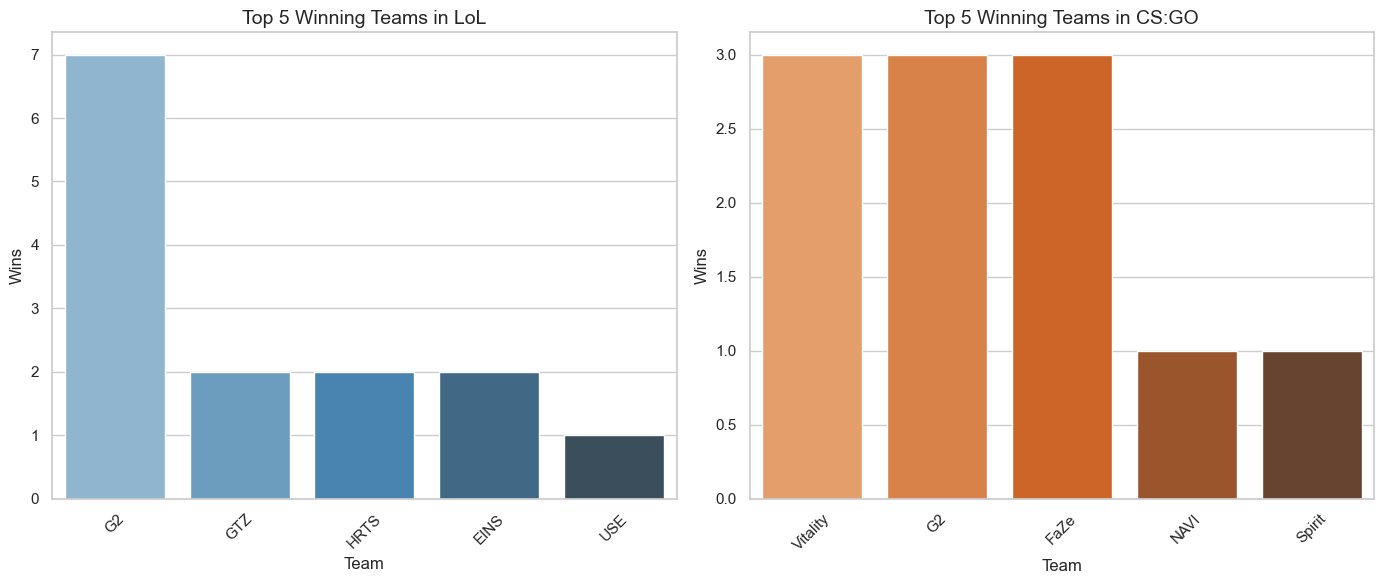

In [209]:

lol_data_filtered = lol_data[lol_data['Winner'] != 'TBD']
csgo_data_filtered = csgo_data[csgo_data['Winner'] != 'TBD']

# Most Successful Teams by Number of Wins in LoL vs CS:GO
lol_top_teams = lol_data_filtered['Winner'].value_counts().nlargest(5).reset_index()
lol_top_teams.columns = ['Team', 'Wins']

csgo_top_teams = csgo_data_filtered['Winner'].value_counts().nlargest(5).reset_index()
csgo_top_teams.columns = ['Team', 'Wins']

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Team', y='Wins', data=lol_top_teams, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 5 Winning Teams in LoL', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Team', y='Wins', data=csgo_top_teams, ax=axes[1], palette='Oranges_d')
axes[1].set_title('Top 5 Winning Teams in CS:GO', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Location-wise Distribution of Tournaments for LoL vs CS:GO

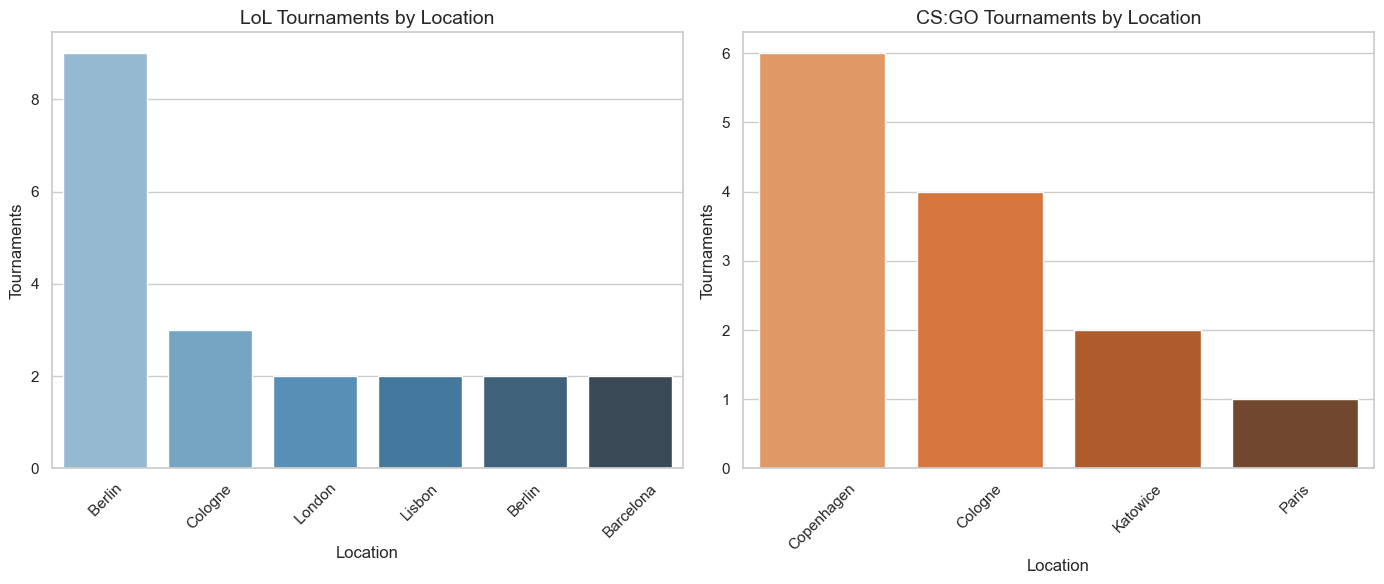

In [185]:
# Count of tournaments by location for each game
lol_location_counts = lol_data['Location'].value_counts().reset_index()
lol_location_counts.columns = ['Location', 'Tournaments']

csgo_location_counts = csgo_data['Location'].value_counts().reset_index()
csgo_location_counts.columns = ['Location', 'Tournaments']

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Location', y='Tournaments', data=lol_location_counts, ax=axes[0], palette='Blues_d')
axes[0].set_title('LoL Tournaments by Location', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Location', y='Tournaments', data=csgo_location_counts, ax=axes[1], palette='Oranges_d')
axes[1].set_title('CS:GO Tournaments by Location', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Yearly Viewership Trend for LoL vs CS:GO

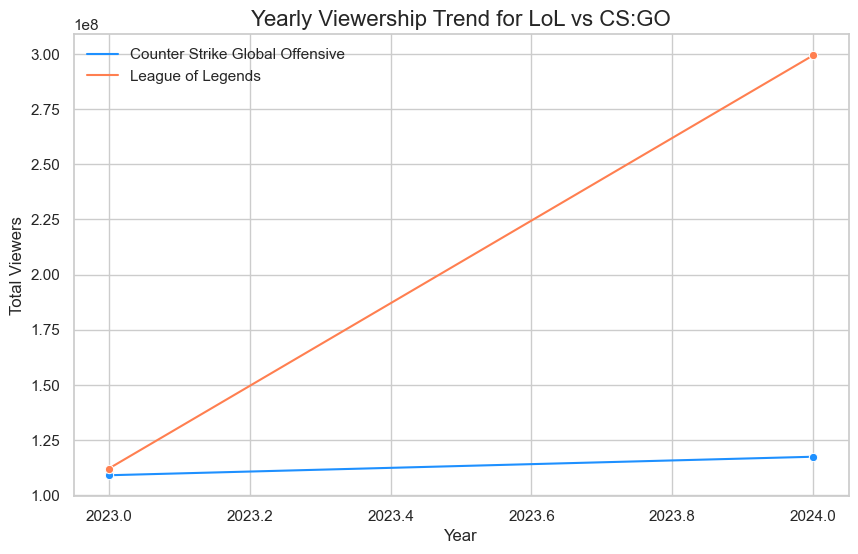

In [210]:
# Group by Year and Game, and sum the viewership
yearly_viewership = data.groupby(['Year', 'Game'])[['Viewers (Twitch)', 'Viewers (Youtube)']].sum().reset_index()
yearly_viewership['Total Viewers'] = yearly_viewership['Viewers (Twitch)'] + yearly_viewership['Viewers (Youtube)']

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total Viewers', hue='Game', data=yearly_viewership, marker='o', palette=['dodgerblue', 'coral'])
plt.title('Yearly Viewership Trend for LoL vs CS:GO', fontsize=16)
plt.ylabel('Total Viewers', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend()
plt.show()

Game-Wise Team Participation Trends for LoL vs CS:GO

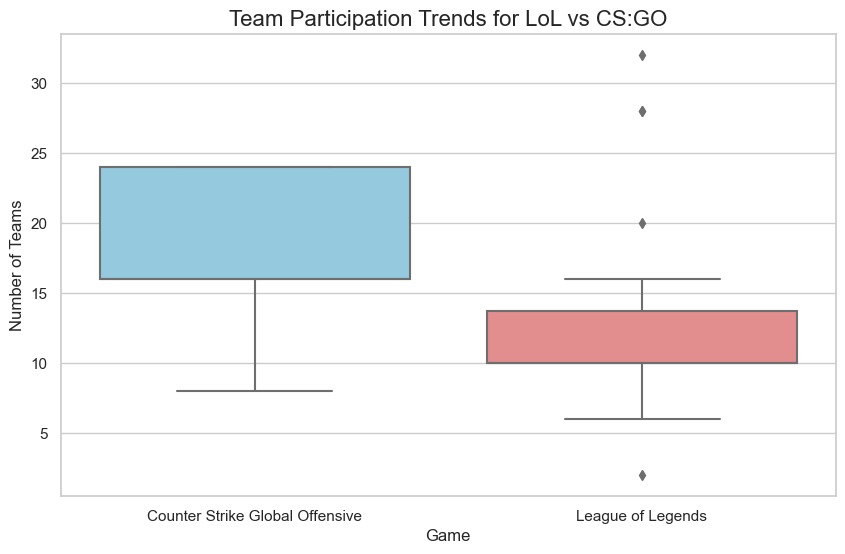

In [188]:
# Box plot for number of teams per game
plt.figure(figsize=(10, 6))
sns.boxplot(x='Game', y='Number of Teams', data=data, palette=['skyblue', 'lightcoral'])
plt.title('Team Participation Trends for LoL vs CS:GO', fontsize=16)
plt.ylabel('Number of Teams', fontsize=12)
plt.show()


Monthly Trends in Tournaments Held for LoL vs CS:GO

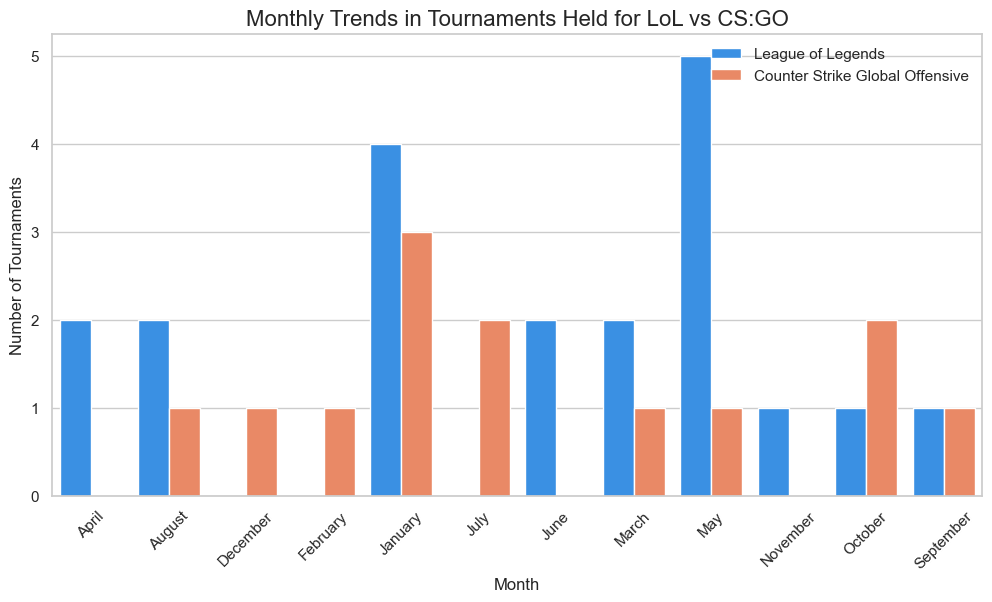

In [190]:
# Extract month from the 'Start Date'
data['Month'] = data['Start Date'].dt.month_name()

# Group by Game and Month to get tournament counts
monthly_tournament_count = data.groupby(['Month', 'Game']).size().reset_index(name='Tournaments')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Tournaments', hue='Game', data=monthly_tournament_count, palette=['dodgerblue', 'coral'])
plt.title('Monthly Trends in Tournaments Held for LoL vs CS:GO', fontsize=16)
plt.ylabel('Number of Tournaments', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()


Comparison of Viewership Across Twitch and YouTube for LoL vs CS:GO

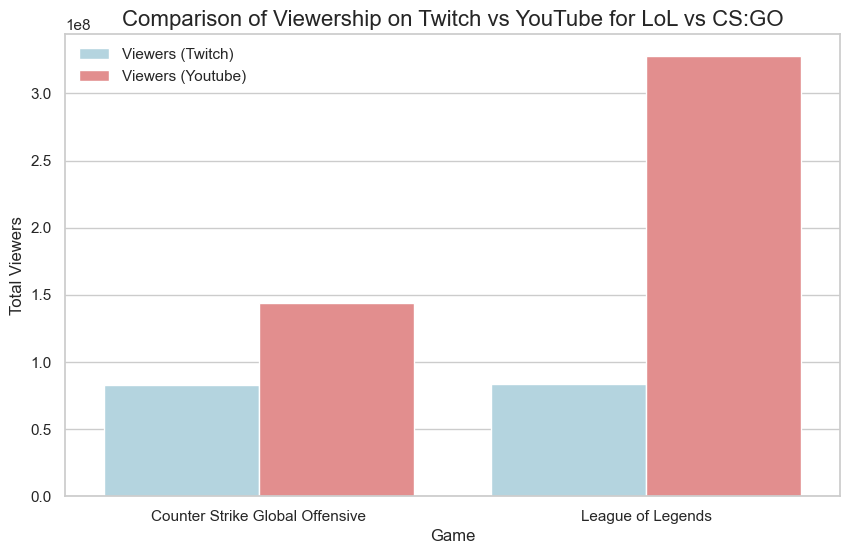

In [192]:
# Sum the viewership for each game and platform
viewership_platform = data.groupby('Game')[['Viewers (Twitch)', 'Viewers (Youtube)']].sum().reset_index()
viewership_melted = viewership_platform.melt(id_vars='Game', var_name='Platform', value_name='Viewers')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Game', y='Viewers', hue='Platform', data=viewership_melted, palette=['lightblue', 'lightcoral'])
plt.title('Comparison of Viewership on Twitch vs YouTube for LoL vs CS:GO', fontsize=16)
plt.ylabel('Total Viewers', fontsize=12)
plt.legend()
plt.show()



 Impact of Tournament Duration on Viewership and Prize Pool for LoL vs CS:GO

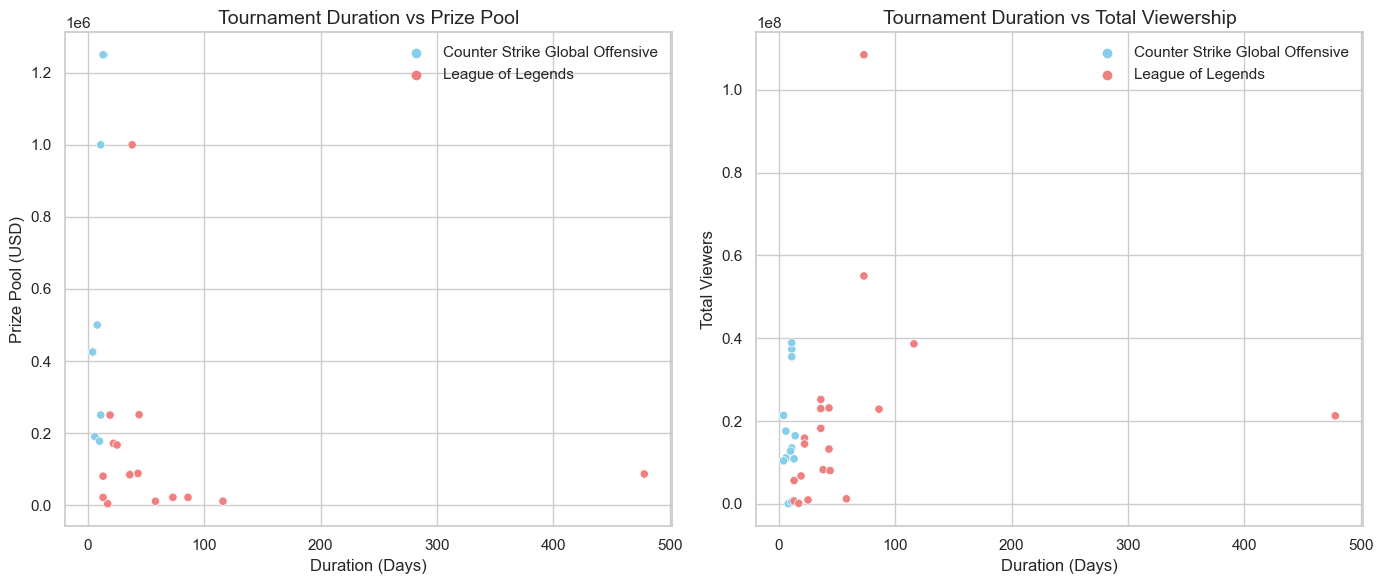

In [194]:
# Scatter plot for Tournament Duration vs Prize Pool and Viewership
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='Duration', y='Prize Pool', hue='Game', data=data, ax=axes[0], palette=['skyblue', 'lightcoral'])
axes[0].set_title('Tournament Duration vs Prize Pool', fontsize=14)
axes[0].set_xlabel('Duration (Days)')
axes[0].set_ylabel('Prize Pool (USD)')
axes[0].legend(title='')

sns.scatterplot(x='Duration', y='Total Viewers', hue='Game', data=data, ax=axes[1], palette=['skyblue', 'lightcoral'])
axes[1].set_title('Tournament Duration vs Total Viewership', fontsize=14)
axes[1].set_xlabel('Duration (Days)')
axes[1].set_ylabel('Total Viewers')
axes[1].legend(title='')
plt.tight_layout()
plt.show()



Game-wise Analysis of Viewers on Twitch vs YouTube for LoL vs CS:GO

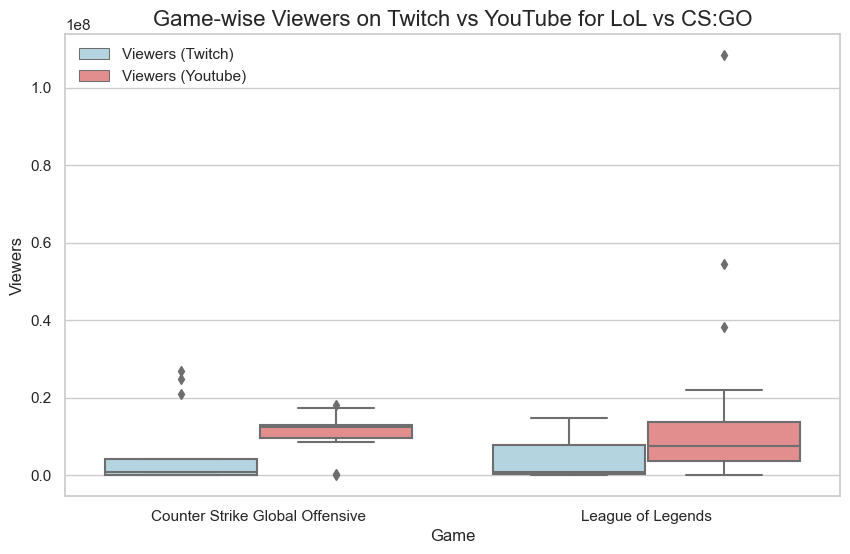

In [196]:
# Melt the data for easier plotting
viewership_melted_box = data.melt(id_vars='Game', value_vars=['Viewers (Twitch)', 'Viewers (Youtube)'], 
                                  var_name='Platform', value_name='Viewers')

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Game', y='Viewers', hue='Platform', data=viewership_melted_box, palette=['lightblue', 'lightcoral'])
plt.title('Game-wise Viewers on Twitch vs YouTube for LoL vs CS:GO', fontsize=16)
plt.ylabel('Viewers', fontsize=12)
plt.legend()
plt.show()


Regional Popularity of LoL vs CS:GO

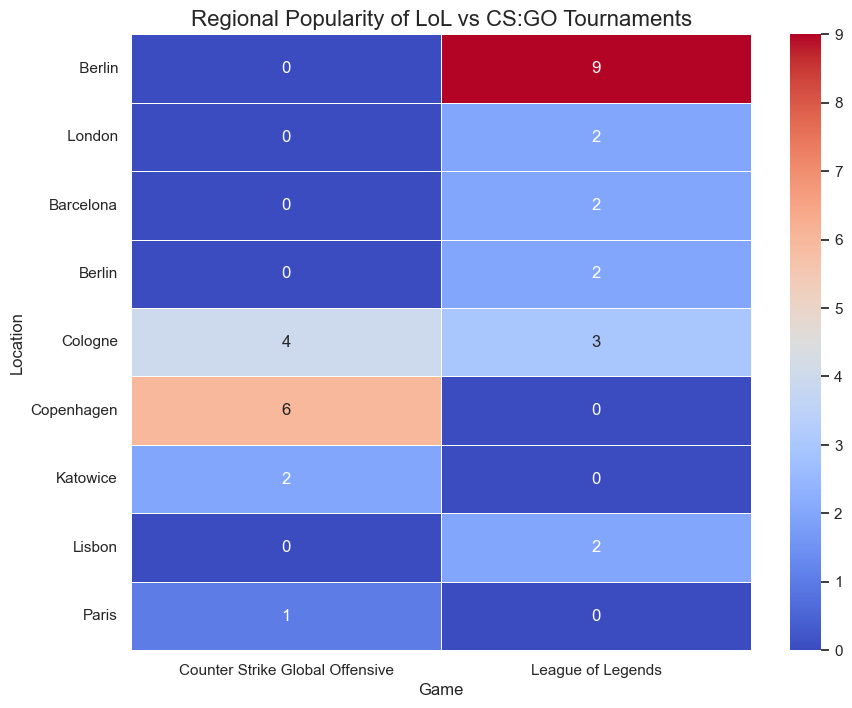

In [197]:
# Group by Location and Game to get tournament counts
regional_popularity = data.groupby(['Location', 'Game']).size().unstack(fill_value=0)

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(regional_popularity, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Regional Popularity of LoL vs CS:GO Tournaments', fontsize=16)
plt.ylabel('Location', fontsize=12)
plt.xlabel('Game', fontsize=12)
plt.show()


Correlation Matrix for LoL vs CS:GO

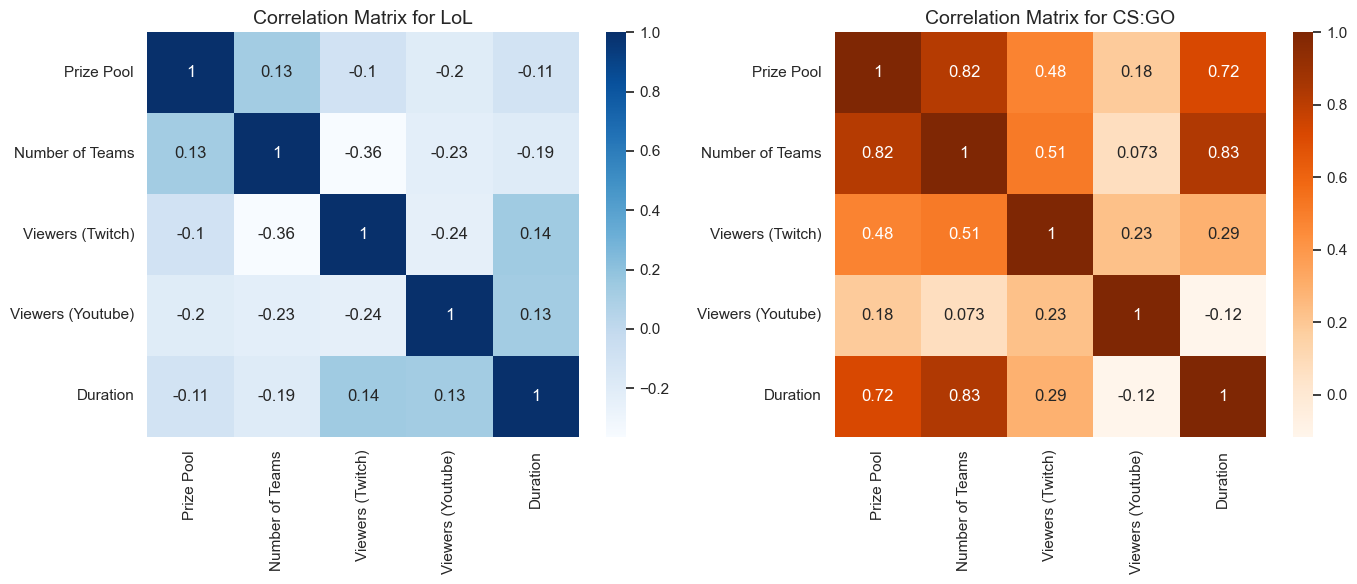

In [198]:
# Correlation matrix for League of Legends
corr_lol = lol_data[['Prize Pool', 'Number of Teams', 'Viewers (Twitch)', 'Viewers (Youtube)', 'Duration']].corr()

# Correlation matrix for CS:GO
corr_csgo = csgo_data[['Prize Pool', 'Number of Teams', 'Viewers (Twitch)', 'Viewers (Youtube)', 'Duration']].corr()

# Plotting heatmaps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(corr_lol, annot=True, cmap='Blues', ax=axes[0])
axes[0].set_title('Correlation Matrix for LoL', fontsize=14)

sns.heatmap(corr_csgo, annot=True, cmap='Oranges', ax=axes[1])
axes[1].set_title('Correlation Matrix for CS:GO', fontsize=14)

plt.tight_layout()
plt.show()

